# Predicting Heart Disease Using Machine Learning

##  Data :

it was obtained from UCI Machine Learning Repositry : https://archive.ics.uci.edu/ml/datasets/heart+disease

* age

* sex

* chest pain type (4 values)

* resting blood pressure

* serum cholestoral in mg/dl

* fasting blood sugar > 120 mg/dl

* resting electrocardiographic results (values 0,1,2)

* maximum heart rate achieved

* exercise induced angina

* oldpeak = ST depression induced by exercise relative to rest

* the slope of the peak exercise ST segment

* number of major vessels (0-3) colored by flourosopy

* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* target (1 or 0)

## importing our tools

In [1]:
# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


 ## * Explatory Data Analysis *

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# info about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# heart disease frequency for sex

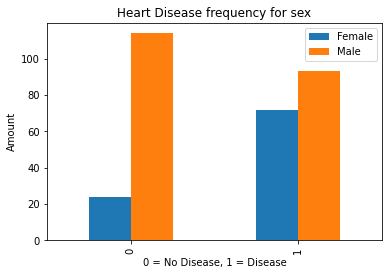

In [7]:
pd.crosstab(data.target, data.sex).plot(kind="bar");
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

## Age vs Max Heart Rate For Heart Disease

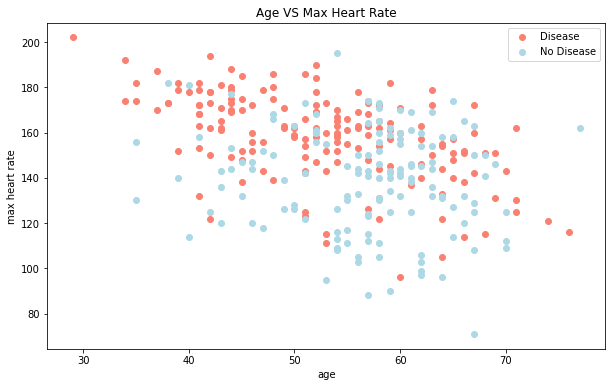

In [8]:
plt.figure(figsize = (10, 6))
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c = "salmon")

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c = "lightblue")

plt.title("Age VS Max Heart Rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Disease", "No Disease"]);

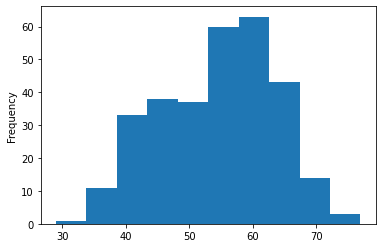

In [9]:
# distribution of age
data.age.plot.hist();

## Hear Disease Frequency per Chest Pain Type
cp: chest pain type

* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

In [10]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


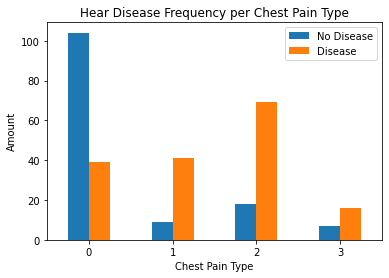

In [11]:
pd.crosstab(data.cp, data.target).plot(kind="bar")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.title("Hear Disease Frequency per Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

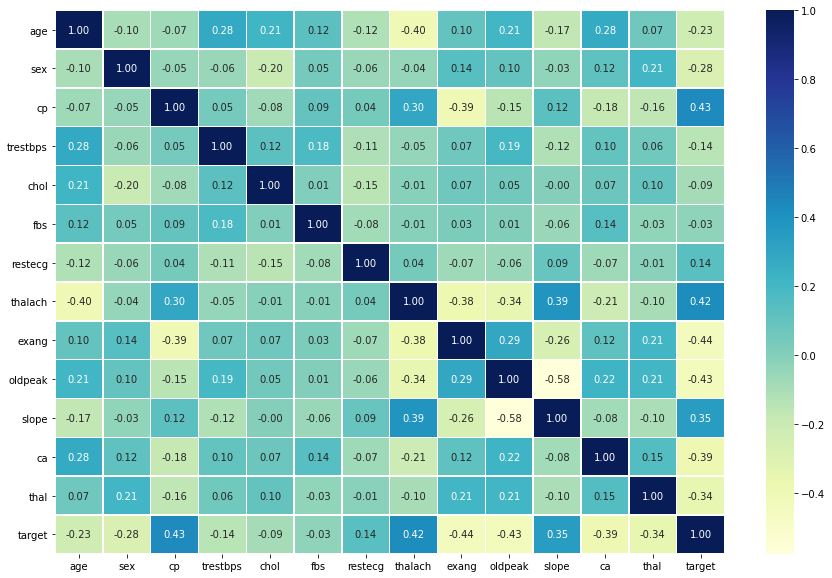

In [12]:
# Correlation matrix
corr_mat = data.corr()
fig , ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths= 0.5,
                 fmt =".2f",
                 cmap = "YlGnBu" );

## * Modeling *

In [13]:
# splitting our data to X and y
X = data.drop("target", axis = 1)
y = data["target"]

In [14]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
# splitting data to train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

We will try 3 ML Models:

* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier

In [17]:
# put models in dictionary
models = {"logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
          "Random Forest Classifier": RandomForestClassifier()}
# function that fits each model and show the score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluate given machine learning models
    models: dict of various models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # dict to save models scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fitting model
        model.fit(X_train, y_train)
        # Evaluating model and adding it to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [18]:
scores = fit_and_score(models, X_train,X_test, y_train, y_test)
scores

c:\users\cyber-tech\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [19]:
scores_compare = pd.DataFrame(scores, index = ["Accuracy"])
scores_compare

,logistic Regression,KNN,Random Forest Classifier
Accuracy,0.885246,0.688525,0.836066


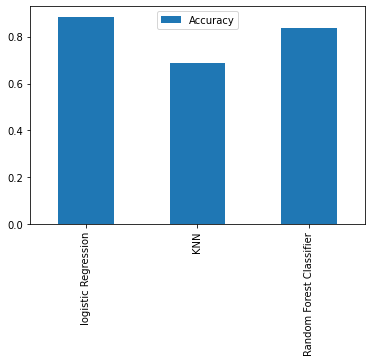

In [20]:
 scores_compare.T.plot.bar();


## Hyperparameter tuning with RandomizedSearchCV

we will tune: LogisticRegression()

using RandomizedSearchCV




In [21]:
# create a hyperparameter grid for logistic regression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}  

# create a hyperparameter grid for RandomForestClassifier
ran_for_grid = {"n_estimators": np.arange(10, 1000, 50), 
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2) }

In [22]:
# Tuning LogisticRegression

np.random.seed(42)

# set up random hyperparameter search for logisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [24]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned Model,  beyond accuracy:

* Confusion matrix
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [25]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

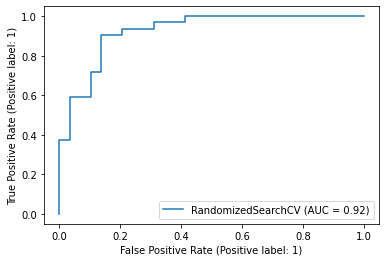

In [27]:
# plot ROC and Calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);

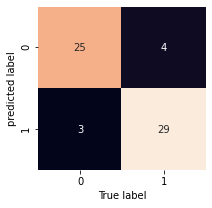

In [28]:
# Confusion matrix
 
def plot_conf_mat(y_test, y_preds):
    """
    plots a confusion matrix
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [29]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



 ## Calculating each evaluation metric using cross-validation

In [30]:
# best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
# create new classifier with best parameters for evaluation
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [32]:
# accuracy
clf_acc = cross_val_score(clf,
                          X, 
                          y,
                          cv=5,
                          scoring="accuracy")

clf_acc = clf_acc.mean()
clf_acc

0.8446994535519124

In [33]:
# precision
clf_precision = cross_val_score(clf,
                          X, 
                          y,
                          cv=5,
                          scoring="precision")

clf_precision = clf_precision.mean()
clf_precision

0.8207936507936507

In [34]:
# recall
clf_recall = cross_val_score(clf,
                          X, 
                          y,
                          cv=5,
                          scoring="recall")

clf_recall = clf_recall.mean()
clf_recall

0.9212121212121213

In [35]:
# f1-score
clf_f1 = cross_val_score(clf,
                          X, 
                          y,
                          cv=5,
                          scoring="f1")

clf_f1 = clf_f1.mean()
clf_f1

0.8673007976269721

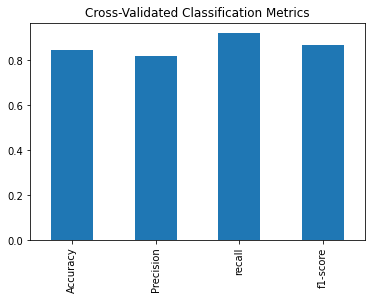

In [36]:
# visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": clf_acc,
                           "Precision": clf_precision,
                           "recall": clf_recall, 
                           "f1-score": clf_f1},
                            index=[0])
cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                      legend=False);

## Feature Importance

Finding the feature important for our Logistic Regression Mode

In [37]:
# fit instance of our model
clf = LogisticRegression(C=0.20433597178569418,
                           solver = "liblinear")
clf.fit(X_train, y_train);

In [38]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044642,  0.66067044, -0.01156993, -0.00166374,
         0.0438611 ,  0.3127584 ,  0.02459361, -0.60413075, -0.56862809,
         0.45051626, -0.63609893, -0.67663372]])

In [39]:
features_dict = dict(zip(data.columns, list(clf.coef_[0])))
features_dict

{'age': 0.00316727909064194,
 'sex': -0.8604464166467225,
 'cp': 0.6606704422417007,
 'trestbps': -0.011569931886984878,
 'chol': -0.0016637437554424402,
 'fbs': 0.043861097387671535,
 'restecg': 0.3127583950938722,
 'thalach': 0.02459361264907642,
 'exang': -0.6041307462224204,
 'oldpeak': -0.5686280912055078,
 'slope': 0.4505162608302495,
 'ca': -0.6360989273374269,
 'thal': -0.6766337210191024}

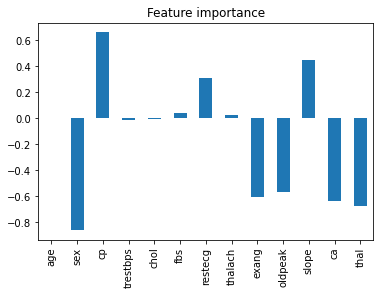

In [40]:
# Visualize feature importance
feature_data = pd.DataFrame(features_dict, index=[0])
feature_data.T.plot.bar(title="Feature importance", legend=False);

 ### saving our model for deployment

In [41]:
import pickle
# open a file, where you ant to store the data
file = open('logistic_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(clf, file)